# QPG with parameter array $[[12, 6, 16], [4, 3; 3]]$

Consider a parameter set for a $3$-class association scheme $\mathcal{A} = (X, \mathcal{R} = \{R_0 = \operatorname{Id}_X, R_1, R_2, R_3\})$ with $35$ vertices with the intersection numbers $p^h_{ij}$ ($0 \le h, i, j \le 3$) given below. Such an association scheme would correspond to a strongly regular graph with a spread, however, no such corresponding strongly regular graph exists, so an association scheme with such parameters does not exist, see [Haemers and Tonchev](https://doi.org/10.1007/BF00130574). Here, we present an alternative proof of nonexistence.

In [1]:
%display latex
import drg
from eigenspace import Eigenspace, VectorError, relmatrix

In [2]:
p = drg.ASParameters(p=list(zip(*
    [ [ [ 1,  0, 0,  0 ], [ 0, 1, 0, 0 ], [ 0, 0, 1, 0 ], [ 0, 0, 0, 1 ] ], 
      [ [ 0, 12, 0,  0 ], [ 1, 5, 2, 4 ], [ 0, 4, 0, 8 ], [ 0, 3, 3, 6 ] ], 
      [ [ 0,  0, 6,  0 ], [ 0, 2, 0, 4 ], [ 1, 0, 5, 0 ], [ 0, 3, 0, 3 ] ], 
      [ [ 0,  0, 0, 16 ], [ 0, 4, 4, 8 ], [ 0, 8, 0, 8 ], [ 1, 6, 3, 6 ] ] ]
)))
p.Q

[    1    10    20     4]
[    1  10/3 -10/3    -1]
[    1  -5/3 -10/3     4]
[    1  -5/2   5/2    -1]

The graph $(X, R_1)$ is a quotient-polynomial graph with parameter array $[[12, 6, 16], [4, 3; 3]]$. From the intersection numbers and the dual eigenmatrix above, we can see that the association scheme $\mathcal{A}$ is imprimitive with imprimitivity set $\tilde{0} = \{0, 2\}$ and dual imprimitivity set $\overline{0} = \{0, 3\}$. We will consider embeddings of subschemes of $\mathcal{A}$ into its eigenspace $S_1$ of dimension $m_1 = 10$. Let us obtain the inner products (i.e., cosines of the angles) between unit vectors $u'_x$ for the vertices $x \in X$ corresponding to the relation they are in.

In [3]:
si = 1
m = p.Q[0, si]
angles, = zip(*(p.Q[:, si] / p.Q[0, si]))
angles

(1, 1/3, -1/6, -1/4)

Since the graph $(X, R_2)$ is a union of five $7$-cliques, we may consider a single $R_2$-clique $X_1$ and find the coefficients for the vectors $u'_x$ ($x \in X_1$).

In [4]:
S = Eigenspace(m, angles)
G11 = Graph(7)
G21 = graphs.CompleteGraph(7)
R1 = relmatrix(G11, G21)
S.vectors(R1)

[                1                 0                 0                 0                 0                 0                 0                 0                 0                 0]
[             -1/6    1/6 * sqrt(35)                 0                 0                 0                 0                 0                 0                 0                 0]
[             -1/6  -1/30 * sqrt(35)  1/15 * sqrt(210)                 0                 0                 0                 0                 0                 0                 0]
[             -1/6  -1/30 * sqrt(35) -1/60 * sqrt(210)    1/4 * sqrt(14)                 0                 0                 0                 0                 0                 0]
[             -1/6  -1/30 * sqrt(35) -1/60 * sqrt(210)  -1/12 * sqrt(14)     1/3 * sqrt(7)                 0                 0                 0                 0                 0]
[             -1/6  -1/30 * sqrt(35) -1/60 * sqrt(210)  -1/12 * sqrt(14)    -1/6 * sqrt(7)    1/6 * sqrt(21)                 0                 0                 0                 0]
[             -1/6  -1/30 * sqrt(35) -1/60 * sqrt(210)  -1/12 * sqrt(14)    -1/6 * sqrt(7)   -1/6 * sqrt(21)                 0                 0                 0                 0]

Let us now consider two $R_2$-cliques, say, $X_1$ and $X_2$, and define $X^{(2)} = X_1 \cup X_2$. Since $1 + p^1_{12} = p^3_{12} = 3$, it follows that the graph $\Gamma^{(2)}_1 = (X^{(2)}, R_1|_{X^{(2)}})$ is a bipartite cubic graph on $14$ vertices with bipartition $X_1 + X_2$, and the choice of this graph and its bipartition uniquely determines the scheme $\mathcal{A}|_{X^{(2)}}$. Let us generate the candidates for $\Gamma^{(2)}_1$.

In [5]:
G12s = list(graphs.nauty_geng("14 -b -d3 -D3"))
len(G12s), sum(G12.is_connected() for G12 in G12s)

(14, 13)

There are $14$ such graphs, of which $13$ are connected. Let us examine the sole disconnected graph.

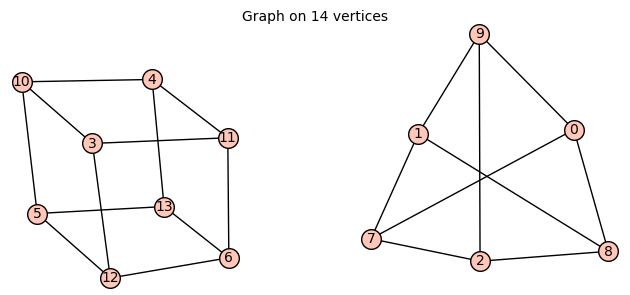

In [6]:
next(G12 for G12 in G12s if not G12.is_connected())

We see that the disconnected graph is isomorphic to $Q_3 + K_{3,3}$, so its two bipartitions are mutually isomorphic. Therefore, there are precisely $14$ mutually non-isomorphic schemes satisfying the conditions above, one for each choice of $\Gamma^{(2)}_1$. Let us print their relation matrices.

In [7]:
G22 = 2 * G21
R2 = [relmatrix(G12, G22) for G12 in G12s]
R2

[
[0 2 2 2 2 2 2 1 1 1 3 3 3 3]  [0 2 2 2 2 2 2 1 1 1 3 3 3 3]
[2 0 2 2 2 2 2 1 1 1 3 3 3 3]  [2 0 2 2 2 2 2 1 1 3 1 3 3 3]
[2 2 0 2 2 2 2 1 1 1 3 3 3 3]  [2 2 0 2 2 2 2 1 1 3 3 3 1 3]
[2 2 2 0 2 2 2 3 3 3 1 1 1 3]  [2 2 2 0 2 2 2 3 3 1 1 1 3 3]
[2 2 2 2 0 2 2 3 3 3 1 1 3 1]  [2 2 2 2 0 2 2 3 3 1 3 1 3 1]
[2 2 2 2 2 0 2 3 3 3 1 3 1 1]  [2 2 2 2 2 0 2 3 3 3 1 3 1 1]
[2 2 2 2 2 2 0 3 3 3 3 1 1 1]  [2 2 2 2 2 2 0 3 3 3 3 1 1 1]
[1 1 1 3 3 3 3 0 2 2 2 2 2 2]  [1 1 1 3 3 3 3 0 2 2 2 2 2 2]
[1 1 1 3 3 3 3 2 0 2 2 2 2 2]  [1 1 1 3 3 3 3 2 0 2 2 2 2 2]
[1 1 1 3 3 3 3 2 2 0 2 2 2 2]  [1 3 3 1 1 3 3 2 2 0 2 2 2 2]
[3 3 3 1 1 1 3 2 2 2 0 2 2 2]  [3 1 3 1 3 1 3 2 2 2 0 2 2 2]
[3 3 3 1 1 3 1 2 2 2 2 0 2 2]  [3 3 3 1 1 3 1 2 2 2 2 0 2 2]
[3 3 3 1 3 1 1 2 2 2 2 2 0 2]  [3 3 1 3 3 1 1 2 2 2 2 2 0 2]
[3 3 3 3 1 1 1 2 2 2 2 2 2 0], [3 3 3 3 1 1 1 2 2 2 2 2 2 0],

[0 2 2 2 2 2 2 1 1 1 3 3 3 3]  [0 2 2 2 2 2 2 1 1 1 3 3 3 3]
[2 0 2 2 2 2 2 1 1 1 3 3 3 3]  [2 0 2 2 2 2 2 1 1 1 3 3 3 3]
[2 2 0 2 2 2 2 1 3 1 1 3 3 3]  [2 2 0 2 2 2 2 1 3 1 1 3 3 3]
[2 2 2 0 2 2 2 3 1 3 1 1 3 3]  [2 2 2 0 2 2 2 3 1 3 3 1 1 3]
[2 2 2 2 0 2 2 3 3 3 1 3 1 1]  [2 2 2 2 0 2 2 3 3 3 1 1 3 1]
[2 2 2 2 2 0 2 3 3 3 3 1 1 1]  [2 2 2 2 2 0 2 3 3 3 1 3 1 1]
[2 2 2 2 2 2 0 3 3 3 3 1 1 1]  [2 2 2 2 2 2 0 3 3 3 3 1 1 1]
[1 1 1 3 3 3 3 0 2 2 2 2 2 2]  [1 1 1 3 3 3 3 0 2 2 2 2 2 2]
[1 1 3 1 3 3 3 2 0 2 2 2 2 2]  [1 1 3 1 3 3 3 2 0 2 2 2 2 2]
[1 1 1 3 3 3 3 2 2 0 2 2 2 2]  [1 1 1 3 3 3 3 2 2 0 2 2 2 2]
[3 3 1 1 1 3 3 2 2 2 0 2 2 2]  [3 3 1 3 1 1 3 2 2 2 0 2 2 2]
[3 3 3 1 3 1 1 2 2 2 2 0 2 2]  [3 3 3 1 1 3 1 2 2 2 2 0 2 2]
[3 3 3 3 1 1 1 2 2 2 2 2 0 2]  [3 3 3 1 3 1 1 2 2 2 2 2 0 2]
[3 3 3 3 1 1 1 2 2 2 2 2 2 0], [3 3 3 3 1 1 1 2 2 2 2 2 2 0],

[0 2 2 2 2 2 2 1 1 1 3 3 3 3]  [0 2 2 2 2 2 2 1 1 1 3 3 3 3]
[2 0 2 2 2 2 2 1 1 1 3 3 3 3]  [2 0 2 2 2 2 2 1 1 1 3 3 3 3]
[2 2 0 2 2 2 2 1 3 3 1 1 3 3]  [2 2 0 2 2 2 2 1 3 3 1 1 3 3]
[2 2 2 0 2 2 2 3 1 3 3 1 1 3]  [2 2 2 0 2 2 2 3 1 3 3 3 1 1]
[2 2 2 2 0 2 2 3 3 1 3 1 3 1]  [2 2 2 2 0 2 2 3 3 1 3 3 1 1]
[2 2 2 2 2 0 2 3 3 3 1 3 1 1]  [2 2 2 2 2 0 2 3 3 3 1 1 1 3]
[2 2 2 2 2 2 0 3 3 3 1 3 1 1]  [2 2 2 2 2 2 0 3 3 3 1 1 3 1]
[1 1 1 3 3 3 3 0 2 2 2 2 2 2]  [1 1 1 3 3 3 3 0 2 2 2 2 2 2]
[1 1 3 1 3 3 3 2 0 2 2 2 2 2]  [1 1 3 1 3 3 3 2 0 2 2 2 2 2]
[1 1 3 3 1 3 3 2 2 0 2 2 2 2]  [1 1 3 3 1 3 3 2 2 0 2 2 2 2]
[3 3 1 3 3 1 1 2 2 2 0 2 2 2]  [3 3 1 3 3 1 1 2 2 2 0 2 2 2]
[3 3 1 1 1 3 3 2 2 2 2 0 2 2]  [3 3 1 3 3 1 1 2 2 2 2 0 2 2]
[3 3 3 1 3 1 1 2 2 2 2 2 0 2]  [3 3 3 1 1 1 3 2 2 2 2 2 0 2]
[3 3 3 3 1 1 1 2 2 2 2 2 2 0], [3 3 3 1 1 3 1 2 2 2 2 2 2 0],

[0 2 2 2 2 2 2 1 1 1 3 3 3 3]  [0 2 2 2 2 2 2 1 1 1 3 3 3 3]
[2 0 2 2 2 2 2 1 1 3 1 3 3 3]  [2 0 2 2 2 2 2 1 1 3 1 3 3 3]
[2 2 0 2 2 2 2 1 3 1 3 1 3 3]  [2 2 0 2 2 2 2 1 3 3 1 1 3 3]
[2 2 2 0 2 2 2 3 1 3 1 3 1 3]  [2 2 2 0 2 2 2 3 1 3 1 3 1 3]
[2 2 2 2 0 2 2 3 3 1 3 1 3 1]  [2 2 2 2 0 2 2 3 3 1 3 1 3 1]
[2 2 2 2 2 0 2 3 3 3 1 3 1 1]  [2 2 2 2 2 0 2 3 3 1 3 3 1 1]
[2 2 2 2 2 2 0 3 3 3 3 1 1 1]  [2 2 2 2 2 2 0 3 3 3 3 1 1 1]
[1 1 1 3 3 3 3 0 2 2 2 2 2 2]  [1 1 1 3 3 3 3 0 2 2 2 2 2 2]
[1 1 3 1 3 3 3 2 0 2 2 2 2 2]  [1 1 3 1 3 3 3 2 0 2 2 2 2 2]
[1 3 1 3 1 3 3 2 2 0 2 2 2 2]  [1 3 3 3 1 1 3 2 2 0 2 2 2 2]
[3 1 3 1 3 1 3 2 2 2 0 2 2 2]  [3 1 1 1 3 3 3 2 2 2 0 2 2 2]
[3 3 1 3 1 3 1 2 2 2 2 0 2 2]  [3 3 1 3 1 3 1 2 2 2 2 0 2 2]
[3 3 3 1 3 1 1 2 2 2 2 2 0 2]  [3 3 3 1 3 1 1 2 2 2 2 2 0 2]
[3 3 3 3 1 1 1 2 2 2 2 2 2 0], [3 3 3 3 1 1 1 2 2 2 2 2 2 0],

[0 2 2 2 2 2 2 1 1 1 3 3 3 3]  [0 2 2 2 2 2 2 1 1 1 3 3 3 3]
[2 0 2 2 2 2 2 1 1 3 1 3 3 3]  [2 0 2 2 2 2 2 1 1 3 1 3 3 3]
[2 2 0 2 2 2 2 1 3 3 1 1 3 3]  [2 2 0 2 2 2 2 1 3 3 1 1 3 3]
[2 2 2 0 2 2 2 3 1 3 3 1 3 1]  [2 2 2 0 2 2 2 3 1 3 3 3 1 1]
[2 2 2 2 0 2 2 3 3 1 3 1 1 3]  [2 2 2 2 0 2 2 3 3 1 3 1 1 3]
[2 2 2 2 2 0 2 3 3 1 3 3 1 1]  [2 2 2 2 2 0 2 3 3 1 3 1 3 1]
[2 2 2 2 2 2 0 3 3 3 1 3 1 1]  [2 2 2 2 2 2 0 3 3 3 1 3 1 1]
[1 1 1 3 3 3 3 0 2 2 2 2 2 2]  [1 1 1 3 3 3 3 0 2 2 2 2 2 2]
[1 1 3 1 3 3 3 2 0 2 2 2 2 2]  [1 1 3 1 3 3 3 2 0 2 2 2 2 2]
[1 3 3 3 1 1 3 2 2 0 2 2 

We now attempt to find embeddings into $S_1$ for each of the obtained relation matrices.

In [8]:
d = {}
for i, R in enumerate(R2):
    try:
        d[i] = S.vectors(R)
        print(f"Graph {i}: found embedding!")
    except VectorError as ex:
        print(f"Graph {i}: {ex} (row {ex.row}, diff {ex.diff})")
len(d)

Graph 0: The norm of the obtained vector is larger than one! (row 8, diff -7/18)
Graph 1: The norm of the obtained vector is larger than one! (row 8, diff -7/18)
Graph 2: The norm of the obtained vector is larger than one! (row 9, diff -35/9)
Graph 3: The norm of the obtained vector is larger than one! (row 9, diff -35/9)
Graph 4: The norm of the obtained vector is larger than one! (row 9, diff -7/4)
Graph 5: The norm of the obtained vector is larger than one! (row 9, diff -7/4)
Graph 6: The norm of the obtained vector is larger than one! (row 9, diff -7/18)
Graph 7: The norm of the obtained vector is larger than one! (row 10, diff -63/32)
Graph 8: The norm of the obtained vector is larger than one! (row 10, diff -119/288)
Graph 9: The norm of the obtained vector is larger than one! (row 10, diff -119/288)
Graph 10: The norm of the obtained vector is larger than one! (row 10, diff -119/288)
Graph 11: The norm of the obtained vector is smaller than one! (row 12, diff 7/18)
Graph 12: The

0

We see that none of the obtained schemes admit an embedding into $S_1$. We thus conclude that the association scheme $\mathcal{A}$ **does not exist**.